In [2]:
import pandas as pd
import os

In [3]:
attendance = pd.read_csv(os.path.join("data", "attendance.csv"))

In [4]:
attendance.head()

,year,league_id,team_id,park_id,span_first,span_last,games,openings,attendance
0,1871,NaN,BS1,BOS01,1871-05-16,1871-10-07,16,16,32600
1,1871,NaN,BS1,NYC01,1871-05-27,1871-05-27,1,1,3000
2,1871,NaN,CH1,CHI01,1871-05-08,1871-09-29,16,15,85500
3,1871,NaN,CH1,NYC01,1871-10-30,1871-10-30,1,1,600
4,1871,NaN,CL1,CIN01,1871-05-13,1871-07-22,2,2,2200


In [5]:
# Take away unneccesary columns

attendance_columns_of_interest = ['year', 'games', 'attendance']
attendance = attendance[attendance_columns_of_interest]

In [6]:
attendance.head()

,year,games,attendance
0,1871,16,32600
1,1871,1,3000
2,1871,16,85500
3,1871,1,600
4,1871,2,2200


In [7]:
attendance.describe()

,year,games,attendance
count,2944.000000,2944.000000,2.944000e+03
mean,1952.110054,70.804008,1.077794e+06
std,42.433247,19.765014,1.032963e+06
min,1871.000000,1.000000,0.000000e+00
25%,1915.000000,74.000000,4.836600e+04
50%,1959.000000,78.000000,8.747525e+05
75%,1990.000000,81.000000,1.805209e+06
max,2014.000000,89.000000,4.483203e+06


In [8]:
# Create new column with average attendance per game
# Copying the dataframe, not directly editing

new_attendance = attendance.copy()
new_attendance['average per game'] = attendance['attendance'] / attendance['games']

In [9]:
new_attendance.head()

,year,games,attendance,average per game
0,1871,16,32600,2037.50
1,1871,1,3000,3000.00
2,1871,16,85500,5343.75
3,1871,1,600,600.00
4,1871,2,2200,1100.00


In [10]:
# Accumulate the average per game for every year
# (there are multiple rows for each year currently)

new_attendance = new_attendance.groupby('year', as_index=False).sum()

new_attendance.columns = ['year', 'games', 'total_attendance', 'average per game per year']

new_attendance.head()

,year,games,total_attendance,average per game per year
0,1871,127,274000,31276.578339
1,1872,183,219050,16217.152436
2,1873,199,0,0.000000
3,1874,232,272497,10275.539312
4,1875,345,398576,20901.508019


In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

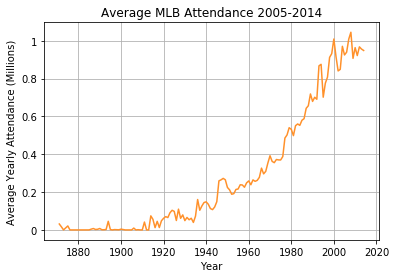

In [12]:
# Make a line graph of all every year

fig, ax = plt.subplots()

x = new_attendance['year']
y = new_attendance['average per game per year']

plt.grid(True)
plt.title("Average MLB Attendance 2005-2014")
plt.xlabel("Year")
plt.ylabel("Average Yearly Attendance (Millions)")

scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

plt.plot(x, y, '#ff912b')

plt.show()

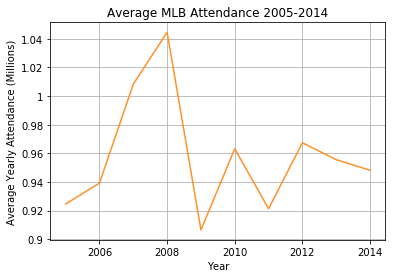

In [13]:
# Same as above, but only the past ten years (to show the levelling-out)

last_ten_years = new_attendance.tail(10)

fig, ax = plt.subplots()

x = last_ten_years['year']
y = last_ten_years['average per game per year']

plt.grid(True)
plt.title("Average MLB Attendance 2005-2014")
plt.xlabel("Year")
plt.ylabel("Average Yearly Attendance (Millions)")

scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

plt.plot(x, y, '#ff912b')

plt.show()

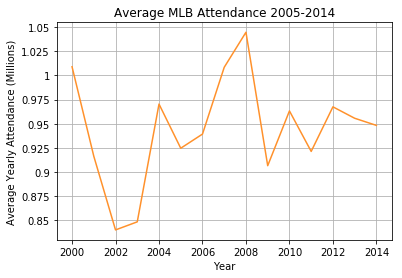

In [14]:
nineties_boom = new_attendance.tail(15)[:20]

fig, ax = plt.subplots()

x = nineties_boom['year']
y = nineties_boom['average per game per year']

plt.grid(True)
plt.title("Average MLB Attendance 2005-2014")
plt.xlabel("Year")
plt.ylabel("Average Yearly Attendance (Millions)")

scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

plt.plot(x, y, '#ff912b')

plt.show()

In [18]:
new_attendance.head(20)

,year,games,total_attendance,average per game per year
0,1871,127,274000,31276.578339
1,1872,183,219050,16217.152436
2,1873,199,0,0.000000
3,1874,232,272497,10275.539312
4,1875,345,398576,20901.508019
5,1876,260,0,0.000000
6,1877,180,0,0.000000
7,1878,184,0,0.000000
8,1879,321,0,0.000000
9,1880,340,0,0.000000


In [66]:
# Create a new column with the percent change in average per game per year from previous year

new_attendance['percent change'] = 100 * new_attendance['average per game per year'].pct_change()
new_attendance.tail(5)

,year,games,total_attendance,average per game per year,percent change
139,2010,2430,73074932,963191.170940,6.248307
140,2011,2429,73425667,921325.289340,-4.346581
141,2012,2430,74859268,967413.178778,5.002347
142,2013,2431,74027037,955607.763403,-1.220307
143,2014,2430,73739622,948219.953196,-0.773101


In [67]:
# Replace 'inf' values with NaN

import numpy as np

new_attendance = new_attendance.replace(np.inf, np.nan)

In [68]:
new_attendance[['year', 'percent change']].tail(30)

,year,percent change
114,1985,4.843370
115,1986,1.461318
116,1987,9.338378
117,1988,2.068244
118,1989,9.517923
119,1990,-5.481333
120,1991,3.236099
121,1992,-1.510091
122,1993,25.570178
123,1994,0.935795


In [76]:
# Visualisation of percent change

x = new_attendance['year']
y = new_attendance['percent change']

plt.show()